CONFUSION MATRIX: 
[[33  2]
 [ 7 45]]
ACCURACY:  0.896551724137931
SENSITIVITY:  0.8653846153846154
SPECIFICITY:  0.9428571428571428
CLASSIFICATION REPORT: 
             precision    recall  f1-score   support

 Republican       0.82      0.94      0.88        35
   Democrat       0.96      0.87      0.91        52

avg / total       0.90      0.90      0.90        87



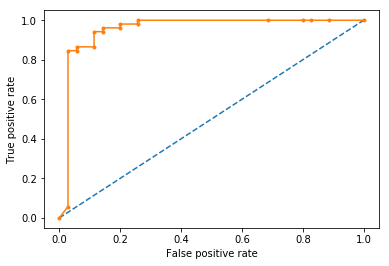

Area Under the Curve:  0.9552197802197803


In [9]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# load the csv file directly into a pandas dataframe
election_df = pd.read_csv('data/house-votes-84.data.txt')

# rename the columns to the real, descriptive names
election_df.columns = ['Class name', 'handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa']

# perform some basic data preparation for the algorithm
# Naive Bayes in scikit-learn needs numeric values, so we map the 'democrat' class to 1, and the 'republican' class to 0
election_df['Class name'] = election_df['Class name'].map({'democrat': 1, 'republican': 0})
# do the same for the features, mapping 'y' to 1, 'n' to 0, and the missing values to -1
for column in election_df:
    if column != 'Class name':
        election_df[column] = election_df[column].map({'y': 1, 'n': 0, '?':-1})

# shuffle data so the samples are equally distributed
election_df = election_df.reindex(np.random.permutation(election_df.index))

# create the train and test sets
features_train, features_test, targets_train, targets_test = model_selection.train_test_split(election_df.drop('Class name', axis=1), election_df['Class name'], test_size=0.2)

# leave Laplace as 1.0, which is the default value
model = GaussianNB()
# train the model with the training data
model.fit(features_train, targets_train)

# make predictions
predicted = model.predict(features_test)
# also save the predicted probabilities
predicted_probabilities = model.predict_proba(features_test)

# save and print the confusion matrix
confusion_matrix = metrics.confusion_matrix(targets_test, predicted)
print('=========================================')
print('CONFUSION MATRIX: ')
print(confusion_matrix)
print('=========================================')

# accuracy, sensitivity and specificity measures
print('=========================================')
print('ACCURACY: ', metrics.accuracy_score(targets_test, predicted))
print('SENSITIVITY: ', confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[1, 0]))
print('SPECIFICITY: ', confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1]))
print('=========================================')

# print the classification report, with precision, recall and F1-score
print('=========================================')
print('CLASSIFICATION REPORT: ')
print(metrics.classification_report(targets_test, predicted, target_names=['Republican', 'Democrat']))
print('=========================================')

# calculate the ROC curve. Use the probabilities for the 'democrat' class
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(targets_test, predicted_probabilities[:, 1])
# plot and show the ROC curve
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(false_positive_rate, true_positive_rate, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
# also calculate the AUC, area under the curve
print ('Area Under the Curve: ', metrics.roc_auc_score(targets_test, predicted_probabilities[:, 1]))

In [18]:
false_positive_rate, true_positive_rate, thresholds

(array([0.        , 0.02857143, 0.02857143, 0.05714286, 0.05714286,
        0.11428571, 0.11428571, 0.14285714, 0.14285714, 0.2       ,
        0.2       , 0.25714286, 0.25714286, 0.68571429, 0.8       ,
        0.82857143, 0.88571429, 1.        ]),
 array([0.        , 0.05769231, 0.84615385, 0.84615385, 0.86538462,
        0.86538462, 0.94230769, 0.94230769, 0.96153846, 0.96153846,
        0.98076923, 0.98076923, 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ]),
 array([2.00000000e+00, 1.00000000e+00, 9.29299442e-01, 9.01576036e-01,
        7.66074431e-01, 1.81476920e-01, 3.69216867e-03, 2.53862969e-03,
        1.49878563e-03, 6.72898484e-05, 4.79679416e-05, 2.41800771e-05,
        2.41033263e-05, 1.75901662e-09, 1.49956735e-09, 1.32813145e-09,
        1.32138999e-09, 3.42141204e-11]))

In [24]:
predicted_probabilities

array([[9.99999959e-01, 4.05264718e-08],
       [1.10831659e-11, 1.00000000e+00],
       [7.26396736e-11, 1.00000000e+00],
       [3.05555237e-05, 9.99969444e-01],
       [9.45927917e-12, 1.00000000e+00],
       [6.67950574e-21, 1.00000000e+00],
       [2.72905417e-07, 9.99999727e-01],
       [8.90979893e-01, 1.09020107e-01],
       [9.97461370e-01, 2.53862969e-03],
       [1.04174944e-12, 1.00000000e+00],
       [3.63234784e-04, 9.99636765e-01],
       [2.85443765e-21, 1.00000000e+00],
       [9.99999724e-01, 2.75925333e-07],
       [1.36310208e-04, 9.99863690e-01],
       [9.96307831e-01, 3.69216867e-03],
       [9.99999990e-01, 1.02098381e-08],
       [1.40753980e-10, 1.00000000e+00],
       [9.99960318e-01, 3.96822803e-05],
       [6.61435441e-07, 9.99999339e-01],
       [4.23252977e-06, 9.99995767e-01],
       [4.81195478e-11, 1.00000000e+00],
       [9.51525769e-01, 4.84742305e-02],
       [2.32169904e-12, 1.00000000e+00],
       [9.99999998e-01, 2.12549565e-09],
       [9.999999